In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

# Load the dataset

In [2]:
pdata= pd.read_csv("Data_Parkinsons")
pdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#Understand the shape of the data
shape_pdata=pdata.shape
shape_pdata

(195, 24)

In [4]:
# Identify Duplicate records in the data 
# It is very important to check and remove data duplicates. 
# Else our model may break or report overly optimistic / pessimistic performance results
dupes=pdata.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes),'\n','Hence, it is quite evident that there are no duplicates in the dataset')

 The number of duplicates in the dataset are: 0 
 Hence, it is quite evident that there are no duplicates in the dataset


In [5]:
# Lets analyze the data types
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Refering the summary of the dataframe as above; In the dataset, all the columns appear to be of numerical data with data type Integer and float. There are no null values.

The dataset contains the following variables:

Numerical variables are as below:

MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)
The Categorical nominal variable is :

Name - ASCII subject name and recording number

In [6]:
pdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No missing values in above data

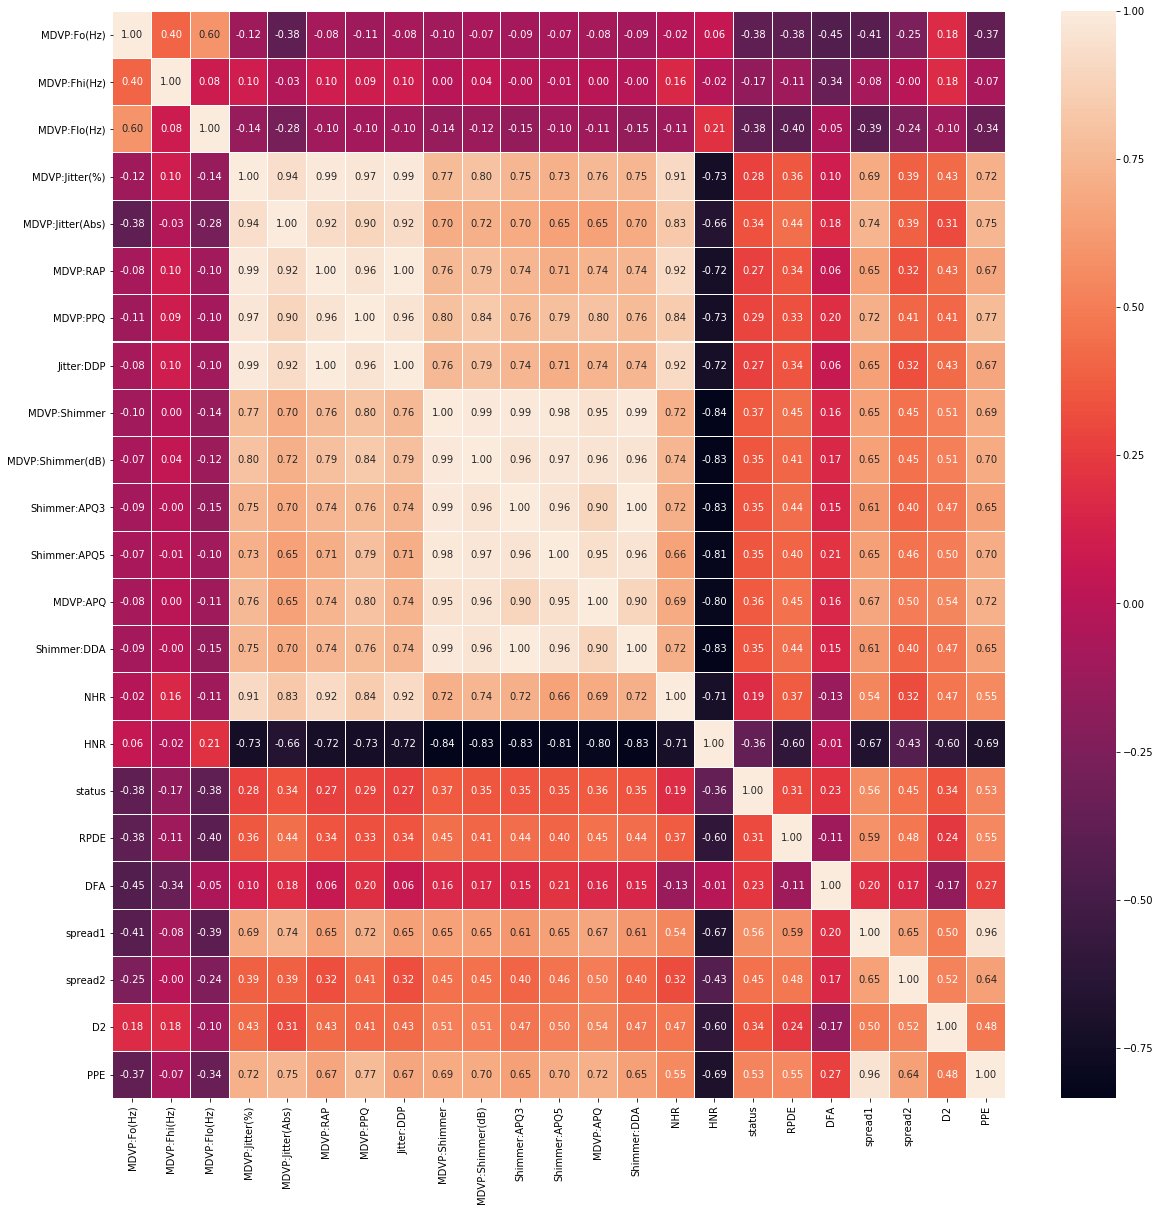

In [7]:
# lets evaluate correlation between different attributes.
corr=pdata.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');

There seems to be a high correlation between multiple independent variables.

Observations and likely challenges in the dataset:

MultiCollinearity: There seems to exist high correlation between multiple independent attributes. This might be a problem since, we would not be able to distinguish between the individual effects of the independent attributes on the dependent attribute. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few attributes with high VIF.
Scaling: Different independent attributes have different scales e.g: DB, %age, Hz etc


In [8]:
pdata["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

there are 147 datapoints where it shows they have disease and  48 datapoints where it shows they don't have disease, 
which means the dataset is skewed

In the target column, there are 48 healthy people & 147 people with Parkinson's disease i.e; one of the 2 classes is under represented or skewed for which the accuaracy at model level can be misleading. So need to consider the accuracy at class level i.e; recall using confusion matrix
'name' is object and also it doesn't contribute in model building so it has to be removed from dataset
Large set of attributes, so building and analysing pair plot is difficult
In 'status' attribute's pair plot, datapoints overlapped over majority region, so distinguishing between classes is difficult.

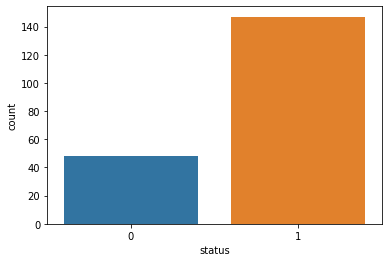

In [9]:
sns.countplot(x='status',data=pdata);

Shows the distribution of status column - univariate analysis of the target column

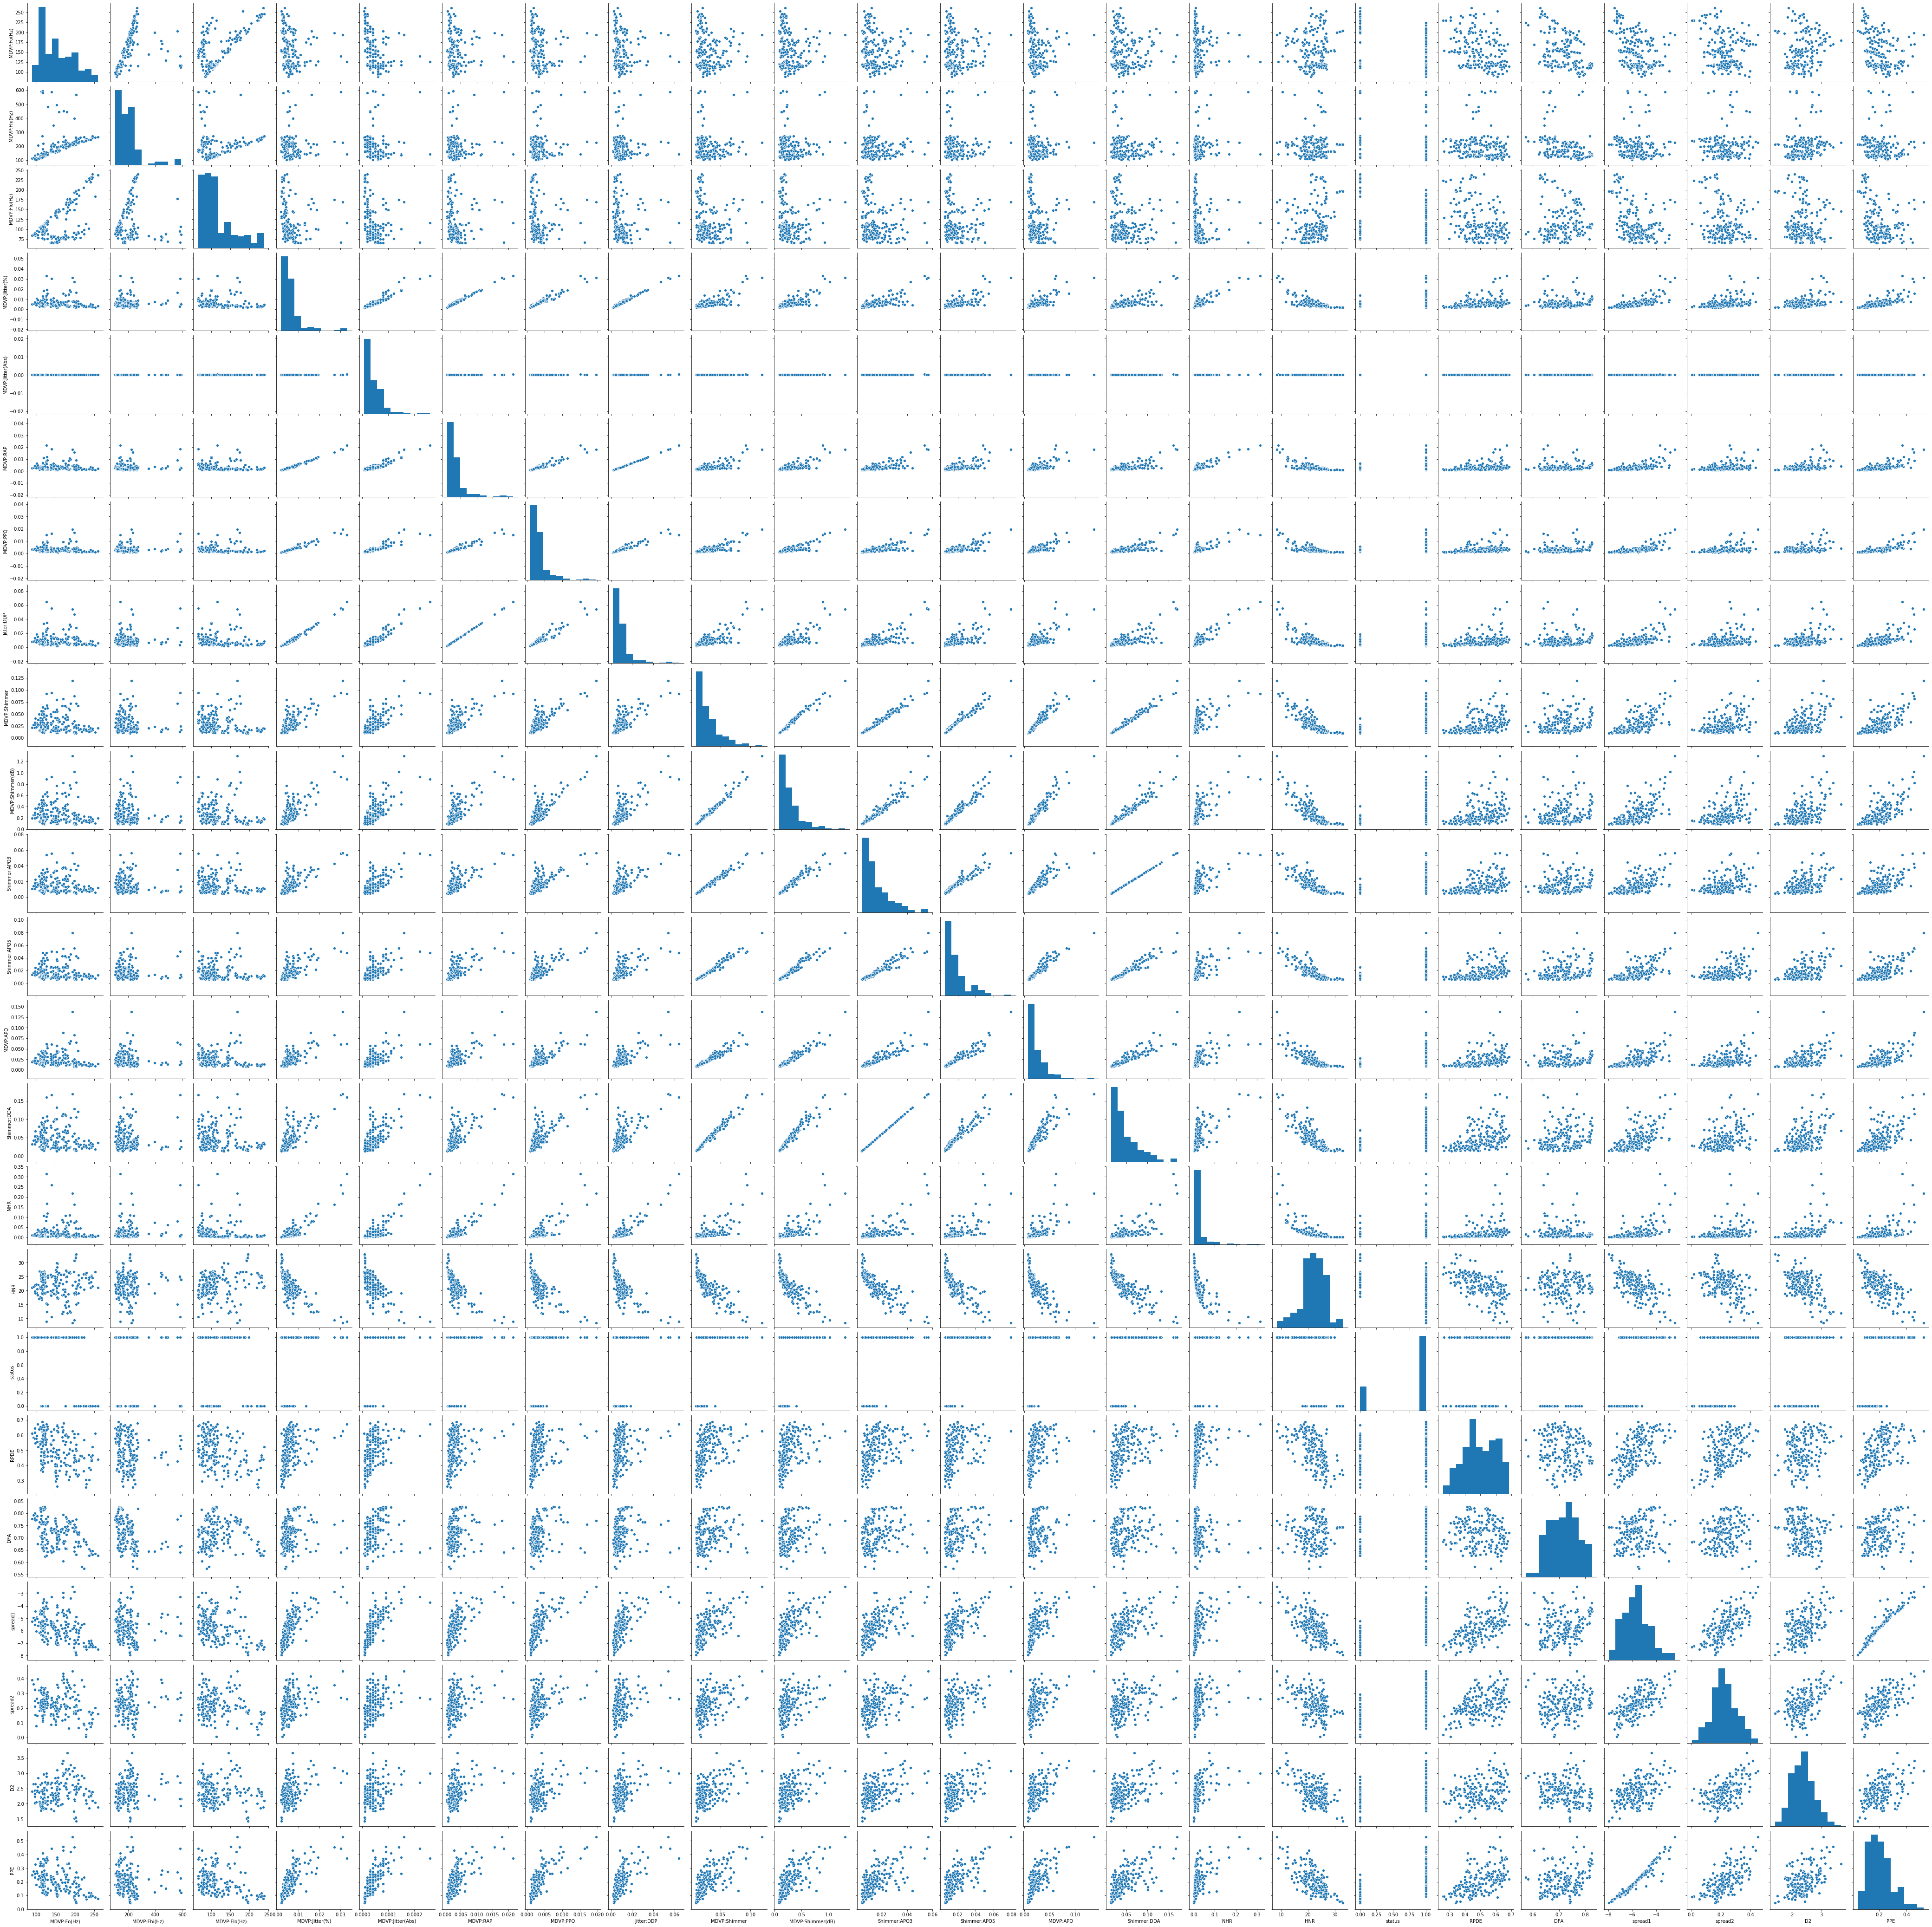

In [11]:
sns.pairplot(pdata);

In 'status' column's pair plot, datapoints (classes) overlapped over majority region, so distinguishing between classes is difficult.
We can see few of the columns are normally distributed like HNR column.
We can see few of the columns are positively correlated like the Jitter:DDP and MDVP:Shimmer columns

I will take the approach of understanding and analysing the attributes in the groups.I am going to perform the following 5 analysis on all the attributes (except name and status - Target variable)

5 point summary
Outliar detection
Skewness check
Spread across the attribute
Co-relation with other attributes
For the target variable:

Comparison between Status of the subject (PD or no PD) and other attribute leveraging different plots

In [12]:
pdata= pd.read_csv("Data_Parkinsons")
pdata=pdata.drop("name",axis=1)
pdata.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Group B : 
    
    MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz) :__ From the data description section  which captures basic statistical information, it appear that all the attributes of group b have right skewness; given that mean is greater than median. Lets perform EDA on Group b

In [13]:
Atr1gB='MDVP:Fo(Hz)'
Atr2gB='MDVP:Fhi(Hz)'
Atr3gB='MDVP:Flo(Hz)'

In [14]:
#5 point summary to understand spread
Atr1gB_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gB]]
Atr2gB_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gB]]
Atr3gB_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr3gB]]

summ_gB = pd.concat([Atr1gB_5pt,Atr2gB_5pt,Atr3gB_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 2 are:','\n','\n',summ_gB)

The 5 point summary of attributes in group 2 are: 
 
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)
min       88.333      102.1450       65.4760
25%      117.572      134.8625       84.2910
50%      148.790      175.8290      104.3150
75%      182.769      224.2055      140.0185
max      260.105      592.0300      239.1700


From the 5 point summary above:

MDVP:Fo(Hz):

The range of MDVP:Fo(Hz) is [88.3,260.1] with a median of 148.7. The mean (from section2.5) is sligtly more that median which means that there could be slight skewness on the right.
It doesnt appear that there are any outliars; we will plot a box plot to confirm the same.

MDVP:Fhi(Hz):

The range of MDVP:Fhi(Hz) is [102.1,592.0] with a median of 175.83. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

MDVP:Flo(Hz):

The range of MDVP:Fhi(Hz) is [65.5,239.2] with a median of 104.3. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

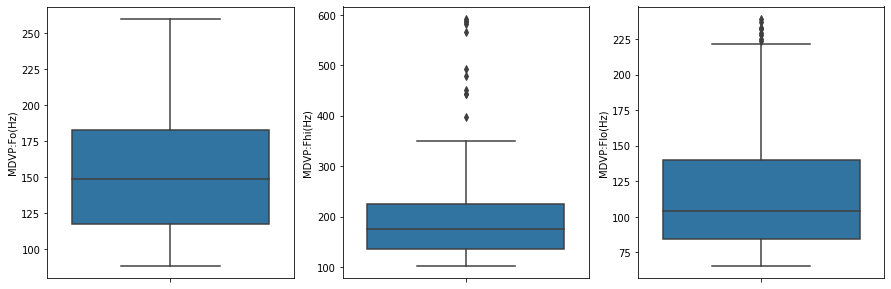

In [15]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,3,figsize=(15,5)) 
sns.boxplot(x=Atr1gB,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gB,data=pdata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3gB,data=pdata,ax=ax[2],orient='v')

From the box plot above it appears that all the 3 attributes have skewness to the right.
There are outliars for attribute MDVP:Fhi(Hz) and MDVP:Flo(Hz)
Lets compute skewness

In [16]:
 #Skewness check
Atr1gB_skew=round(stats.skew(pdata[Atr1gB]),4)
Atr2gB_skew=round(stats.skew(pdata[Atr2gB]),4)
Atr3gB_skew=round(stats.skew(pdata[Atr3gB]),4)

print(' The skewness of',Atr1gB,'is', Atr1gB_skew)
print(' The skewness of',Atr2gB,'is', Atr2gB_skew)
print(' The skewness of',Atr3gB,'is', Atr3gB_skew)

 The skewness of MDVP:Fo(Hz) is 0.5872
 The skewness of MDVP:Fhi(Hz) is 2.5225
 The skewness of MDVP:Flo(Hz) is 1.208


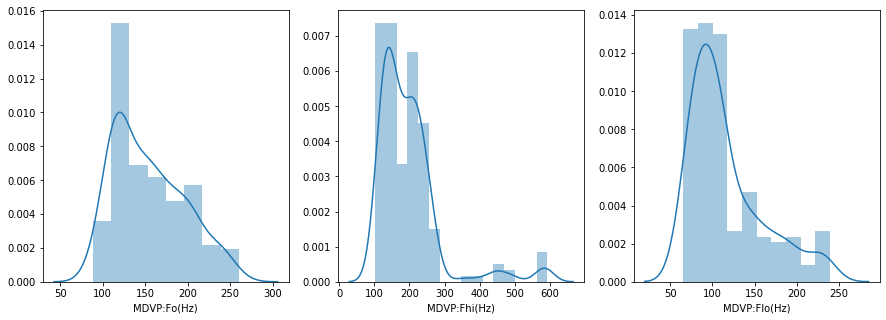

In [17]:
# Spread
fig, ax = plt.subplots(1,3,figsize=(15,5)) 
sns.distplot(pdata[Atr1gB],ax=ax[0]) 
sns.distplot(pdata[Atr2gB],ax=ax[1]) 
sns.distplot(pdata[Atr3gB],ax=ax[2])

The plots above represents the 3 measures of the vocal fundamental frequency. The skewness is also evident from the plots.
Peak frequencies are noticed between 75 and 125 for Average vocal frequency (MDVP:Flo(Hz)); at 125 for Maximum vocal frequency (MDVP:Fo(Hz)); For High vocal frequency, the peak seems to happen at 150; </br>there are also some value at the right most tail

In [18]:
#Correlation of attributes of group B with other attributes.
corr_atr1gB=pdata[pdata.columns].corr()[Atr1gB][:]
corr_atr2gB=pdata[pdata.columns].corr()[Atr2gB][:]
corr_atr3gB=pdata[pdata.columns].corr()[Atr3gB][:]
pd.concat([round(corr_atr1gB,4),round(corr_atr2gB,4),round(corr_atr3gB,4)],axis=1,sort=False).T


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0000,0.401,0.5965,-0.1180,-0.3820,-0.0762,-0.1122,-0.0762,-0.0984,-0.0737,...,-0.0947,-0.0220,0.0591,-0.3835,-0.3839,-0.4460,-0.4137,-0.2495,0.1780,-0.3724
MDVP:Fhi(Hz),0.4010,1.000,0.0850,0.1021,-0.0292,0.0972,0.0911,0.0971,0.0023,0.0435,...,-0.0037,0.1638,-0.0249,-0.1661,-0.1124,-0.3431,-0.0767,-0.0030,0.1763,-0.0695
MDVP:Flo(Hz),0.5965,0.085,1.0000,-0.1399,-0.2778,-0.1005,-0.0958,-0.1005,-0.1445,-0.1191,...,-0.1507,-0.1087,0.2109,-0.3802,-0.4001,-0.0504,-0.3949,-0.2438,-0.1006,-0.3401


MDVP:Fo(Hz)

which is Average vocal fundamental frequency has some correlation with MDVP:Fhi(Hz) - Maximum vocal fundamental frequency and MDVP:Flo(Hz) - Minimum vocal fundamental frequency. All 3 of them are measures of vocal fundamental frequency.
Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute.

MDVP:Fhi(Hz)

which is maximum vocal fundamental frequency has some correlation with MDVP:Fo(Hz) - Average vocal fundamental frequency.
Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute.

MDVP:Flo(Hz)

which is minimum vocal fundamental frequency has some correlation with MDVP:Fo(Hz) - Average vocal fundamental frequency.
Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute.

Group C :

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP :__ From the data description section which captures basic statistical information, it appear that all the attributes of group c have right skewness; given that mean is greater than median. Lets perform EDA on Group 3.

In [19]:
Atr1gC='MDVP:Jitter(%)'
Atr2gC='MDVP:Jitter(Abs)'
Atr3gC='MDVP:RAP'
Atr4gC='MDVP:PPQ'
Atr5gC='Jitter:DDP'

In [20]:
#5 point summary to understand spread
Atr1gC_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gC]]
Atr2gC_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gC]]
Atr3gC_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr3gC]]
Atr4gC_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr4gC]]
Atr5gC_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr5gC]]

summ_gC = pd.concat([Atr1gC_5pt,Atr2gC_5pt,Atr3gC_5pt,Atr4gC_5pt,Atr5gC_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gC)

The 5 point summary of attributes in group c are: 
 
      MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP
min        0.001680          0.000007  0.000680  0.000920    0.002040
25%        0.003460          0.000020  0.001660  0.001860    0.004985
50%        0.004940          0.000030  0.002500  0.002690    0.007490
75%        0.007365          0.000060  0.003835  0.003955    0.011505
max        0.033160          0.000260  0.021440  0.019580    0.064330


From the 5 point summary above:

MDVP:Jitter(%):

The range of MDVP:Jitter(%) is [0.0016, 0.0332] with a median of 0.0049. The mean (from section2.5) is sligtly more than median which means that there could be slight skewness on the right.
There appear to be certain outliars on the right. we will plot a box plot to confirm the same.

MDVP:Jitter(Abs):

The range of MDVP:Jitter(Abs) is [0.000007, 0.000260] with a median of 0.000030. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

MDVP:RAP:

The range of MDVP:RAP is [0.000680,0.021440] with a median of 0.002500. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

MDVP:PPQ:

The range of MDVP:PPQ is [0.000920,0.019580] with a median of 0.002690. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

Jitter:DDP:

The range of Jitter:DDP is [0.002040,0.064330] with a median of 0.007490. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

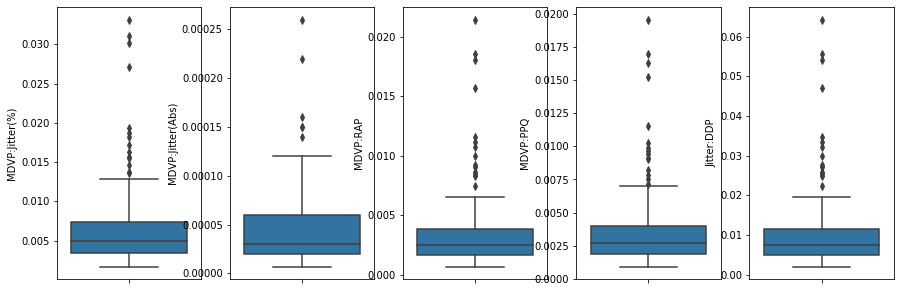

In [21]:
#Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,5,figsize=(15,5)) 
sns.boxplot(x=Atr1gC,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gC,data=pdata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3gC,data=pdata,ax=ax[2],orient='v')
sns.boxplot(x=Atr4gC,data=pdata,ax=ax[3],orient='v')
sns.boxplot(x=Atr5gC,data=pdata,ax=ax[4],orient='v')

From the box plot above it appears that all the 5 attributes have skewness to the right. We'll compute the skewness in the next section
There are outliars in all the attributes

In [22]:
#Skewness check
Atr1gC_skew=round(stats.skew(pdata[Atr1gC]),4)
Atr2gC_skew=round(stats.skew(pdata[Atr2gC]),4)
Atr3gC_skew=round(stats.skew(pdata[Atr3gC]),4)
Atr4gC_skew=round(stats.skew(pdata[Atr4gC]),4)
Atr5gC_skew=round(stats.skew(pdata[Atr5gC]),4)


print(' The skewness of',Atr1gC,'is', Atr1gC_skew)
print(' The skewness of',Atr2gC,'is', Atr2gC_skew)
print(' The skewness of',Atr3gC,'is', Atr3gC_skew)
print(' The skewness of',Atr4gC,'is', Atr4gC_skew)
print(' The skewness of',Atr5gC,'is', Atr5gC_skew)

 The skewness of MDVP:Jitter(%) is 3.0612
 The skewness of MDVP:Jitter(Abs) is 2.6287
 The skewness of MDVP:RAP is 3.3348
 The skewness of MDVP:PPQ is 3.0502
 The skewness of Jitter:DDP is 3.3361


Clearly all 5 attributes have skewness with attribute Jitter:DDP and MDVP:RAP having the highest skewness

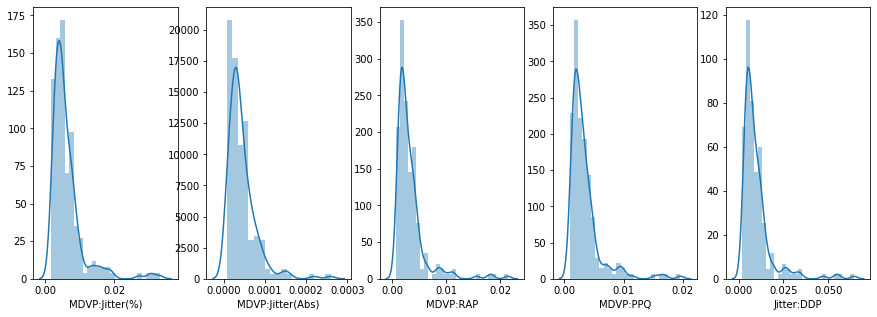

In [23]:
# Spread
fig, ax = plt.subplots(1,5,figsize=(15,5)) 
sns.distplot(pdata[Atr1gC],ax=ax[0]) 
sns.distplot(pdata[Atr2gC],ax=ax[1]) 
sns.distplot(pdata[Atr3gC],ax=ax[2])
sns.distplot(pdata[Atr4gC],ax=ax[3])
sns.distplot(pdata[Atr5gC],ax=ax[4])

The plots above represents the Several measures of variation in fundamental frequency. Right skewness is also evident from the plots.

In [25]:
#Correlation of attributes of group b with other attributes.
corr_atr1gC=pdata[pdata.columns].corr()[Atr1gC][:]
corr_atr2gC=pdata[pdata.columns].corr()[Atr2gC][:]
corr_atr3gC=pdata[pdata.columns].corr()[Atr3gC][:]
corr_atr4gC=pdata[pdata.columns].corr()[Atr4gC][:]
corr_atr5gC=pdata[pdata.columns].corr()[Atr5gC][:]

pd.concat([round(corr_atr1gC,4),round(corr_atr1gC,4),round(corr_atr1gC,4),round(corr_atr1gC,4),round(corr_atr1gC,4)],axis=1,sort=False).T


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,...,0.7466,0.907,-0.7282,0.2782,0.3607,0.0986,0.6936,0.3851,0.4334,0.7215
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,...,0.7466,0.907,-0.7282,0.2782,0.3607,0.0986,0.6936,0.3851,0.4334,0.7215
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,...,0.7466,0.907,-0.7282,0.2782,0.3607,0.0986,0.6936,0.3851,0.4334,0.7215
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,...,0.7466,0.907,-0.7282,0.2782,0.3607,0.0986,0.6936,0.3851,0.4334,0.7215
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,...,0.7466,0.907,-0.7282,0.2782,0.3607,0.0986,0.6936,0.3851,0.4334,0.7215


While all the 5 measure of variation in fundamental frequency have low correlation with the measure of Vocal fundamental frequency;
However, they seem to have high correlation with almost of all the other attributes.
This raises concerns about the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

Group D :

MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA:__ From the data description section  which captures basic statistical information, it appear that all the attributes of group d have right skewness; given that mean is greater than median . Lets perform EDA on Group d.

In [26]:
Atr1gD='MDVP:Shimmer'
Atr2gD='MDVP:Shimmer(dB)'
Atr3gD='Shimmer:APQ3'
Atr4gD='Shimmer:APQ5'
Atr5gD='MDVP:APQ'
Atr6gD='Shimmer:DDA'

In [27]:
#5 point summary to understand spread
Atr1gD_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gD]]
Atr2gD_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gD]]
Atr3gD_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr3gD]]
Atr4gD_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr4gD]]
Atr5gD_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr5gD]]
Atr6gD_6pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr6gD]]

summ_gD = pd.concat([Atr1gD_5pt,Atr2gD_5pt,Atr3gD_5pt,Atr4gD_5pt,Atr5gD_5pt,Atr6gD_6pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gD)

The 5 point summary of attributes in group c are: 
 
      MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
min      0.009540            0.0850      0.004550       0.00570   0.00719   
25%      0.016505            0.1485      0.008245       0.00958   0.01308   
50%      0.022970            0.2210      0.012790       0.01347   0.01826   
75%      0.037885            0.3500      0.020265       0.02238   0.02940   
max      0.119080            1.3020      0.056470       0.07940   0.13778   

     Shimmer:DDA  
min     0.013640  
25%     0.024735  
50%     0.038360  
75%     0.060795  
max     0.169420  


From the 5 point summary above:

MDVP:Shimmer(%):

The range of MDVP:Shimmer(%) is [0.009540, 0.119080] with a median of 0.022970. The mean (from section2.5) is sligtly more than median which means that there could be slight skewness on the right.
There appear to be certain outliars on the right. we will plot a box plot to confirm the same.

MDVP:Shimmer(dB):

The range of MDVP:Shimmer(dB) is [0.085000, 1.302000] with a median of 0.221000. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

Shimmer:APQ3:

The range of Shimmer:APQ3 is [0.004550,0.056470] with a median of 0.012790. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

Shimmer:APQ5:

The range of Shimmer:APQ5 is [0.005700,0.079400] with a median of 0.013470. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

MDVP:APQ:

The range of MDVP:APQ is [0.007190,0.137780] with a median of 0.018260. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.

Shimmer:DDA:

The range of Shimmer:DDA is [0.013640,0.169420] with a median of 0.038360. The mean (from section2.5) is more than median which means that there could be skewness on the right.
There might be potential outliars which we will identify by plotting a box plot.


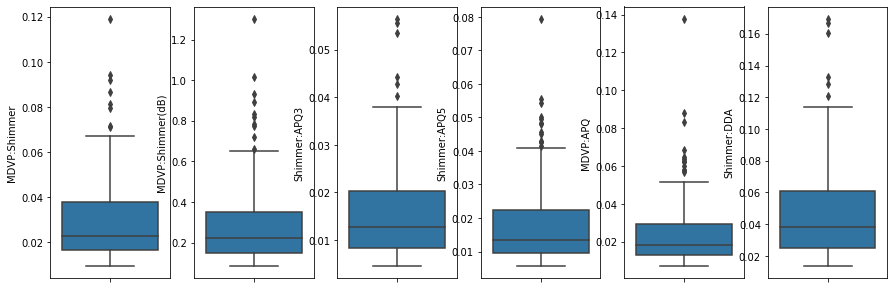

In [28]:
#Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,6,figsize=(15,5)) 
sns.boxplot(x=Atr1gD,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gD,data=pdata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3gD,data=pdata,ax=ax[2],orient='v')
sns.boxplot(x=Atr4gD,data=pdata,ax=ax[3],orient='v')
sns.boxplot(x=Atr5gD,data=pdata,ax=ax[4],orient='v')
sns.boxplot(x=Atr6gD,data=pdata,ax=ax[5],orient='v')

From the box plot above it appears that all the 6 attributes have skewness to the right. We'll compute the skewness in the next section
There are outliars in all the attributes

In [29]:
#Skewness check
Atr1gD_skew=round(stats.skew(pdata[Atr1gD]),4)
Atr2gD_skew=round(stats.skew(pdata[Atr2gD]),4)
Atr3gD_skew=round(stats.skew(pdata[Atr3gD]),4)
Atr4gD_skew=round(stats.skew(pdata[Atr4gD]),4)
Atr5gD_skew=round(stats.skew(pdata[Atr5gD]),4)
Atr6gD_skew=round(stats.skew(pdata[Atr6gD]),4)



print(' The skewness of',Atr1gD,'is', Atr1gD_skew)
print(' The skewness of',Atr2gD,'is', Atr2gD_skew)
print(' The skewness of',Atr3gD,'is', Atr3gD_skew)
print(' The skewness of',Atr4gD,'is', Atr4gD_skew)
print(' The skewness of',Atr5gD,'is', Atr5gD_skew)
print(' The skewness of',Atr6gD,'is', Atr6gD_skew)

 The skewness of MDVP:Shimmer is 1.6536
 The skewness of MDVP:Shimmer(dB) is 1.984
 The skewness of Shimmer:APQ3 is 1.5684
 The skewness of Shimmer:APQ5 is 1.7848
 The skewness of MDVP:APQ is 2.5979
 The skewness of Shimmer:DDA is 1.5684


Clearly all 6 attributes have skewness with attribute MDVP:APQ having the highest skewness

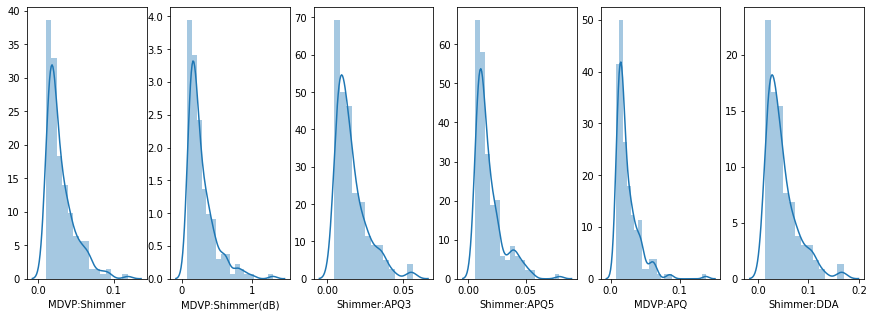

In [30]:
# Spread
fig, ax = plt.subplots(1,6,figsize=(15,5)) 
sns.distplot(pdata[Atr1gD],ax=ax[0]) 
sns.distplot(pdata[Atr2gD],ax=ax[1]) 
sns.distplot(pdata[Atr3gD],ax=ax[2])
sns.distplot(pdata[Atr4gD],ax=ax[3])
sns.distplot(pdata[Atr5gD],ax=ax[4])
sns.distplot(pdata[Atr6gD],ax=ax[5])

The plots above represents the Several measures of variation in amplitude. Right skewness is also evident from the plots.

In [31]:
#Correlation of attributes of group D with other attributes.
corr_atr1gD=pdata[pdata.columns].corr()[Atr1gD][:]
corr_atr2gD=pdata[pdata.columns].corr()[Atr2gD][:]
corr_atr3gD=pdata[pdata.columns].corr()[Atr3gD][:]
corr_atr4gD=pdata[pdata.columns].corr()[Atr4gD][:]
corr_atr5gD=pdata[pdata.columns].corr()[Atr5gD][:]
corr_atr6gD=pdata[pdata.columns].corr()[Atr6gD][:]

pd.concat([round(corr_atr1gD,4),round(corr_atr2gD,4),round(corr_atr3gD,4),round(corr_atr4gD,4),round(corr_atr5gD,4),round(corr_atr6gD,4)],axis=1,sort=False).T


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Shimmer,-0.0984,0.0023,-0.1445,0.7691,0.7033,0.7596,0.7978,0.7596,1.0000,0.9873,...,0.9876,0.7222,-0.8353,0.3674,0.4474,0.1600,0.6547,0.4520,0.5071,0.6938
MDVP:Shimmer(dB),-0.0737,0.0435,-0.1191,0.8043,0.7166,0.7907,0.8392,0.7906,0.9873,1.0000,...,0.9632,0.7445,-0.8278,0.3507,0.4107,0.1652,0.6525,0.4543,0.5122,0.6951
Shimmer:APQ3,-0.0947,-0.0037,-0.1507,0.7466,0.6972,0.7449,0.7636,0.7449,0.9876,0.9632,...,1.0000,0.7162,-0.8271,0.3476,0.4352,0.1511,0.6110,0.4022,0.4673,0.6454
Shimmer:APQ5,-0.0707,-0.0100,-0.1011,0.7256,0.6490,0.7099,0.7868,0.7099,0.9828,0.9738,...,0.9601,0.6581,-0.8138,0.3511,0.3999,0.2139,0.6468,0.4572,0.5022,0.7025
MDVP:APQ,-0.0778,0.0049,-0.1073,0.7583,0.6488,0.7375,0.8041,0.7374,0.9501,0.9610,...,0.8966,0.6940,-0.8004,0.3643,0.4514,0.1573,0.6732,0.5022,0.5369,0.7217
Shimmer:DDA,-0.0947,-0.0037,-0.1507,0.7466,0.6972,0.7449,0.7636,0.7449,0.9876,0.9632,...,1.0000,0.7162,-0.8271,0.3476,0.4352,0.1511,0.6110,0.4022,0.4673,0.6454


While all the 6 measure of variation in amplitude have low correlation with the measure of Vocal fundamental frequency;
However, they seem to have high correlation with almost of all the other attributes.
As high lighted while performing EDA for group C, for group D as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

In [32]:
Atr1gE='NHR'
Atr2gE='HNR'


In [33]:
#5 point summary to understand spread
Atr1gE_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gE]]
Atr2gE_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gE]]

summ_gE = pd.concat([Atr1gE_5pt,Atr2gE_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gE)

The 5 point summary of attributes in group c are: 
 
           NHR      HNR
min  0.000650   8.4410
25%  0.005925  19.1980
50%  0.011660  22.0850
75%  0.025640  25.0755
max  0.314820  33.0470


From the 5 point summary above:

NHR:

The range of NHR is [0.000650,0.314820] with a median of 0.011660. The mean (from section2.5) is more than median which means that there could be slight skewness on the right.
There appear to be certain outliars on the right. we will plot a box plot to confirm the same.

HNR:

The range of HNR is [8.441000,33.047000] with a median of 22.085000. The mean (from section2.5) is less than median which means that there could be skewness on the left.
There might be potential outliars which we will identify by plotting a box plot.


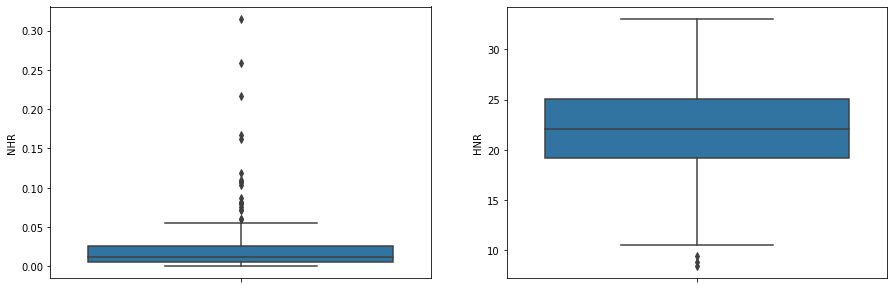

In [34]:
#Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.boxplot(x=Atr1gE,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gE,data=pdata, ax=ax[1],orient='v')


From the box plot above it appears that while NHR is right skewed; HNR seems to have skewness towards the left. We'll compute the skewness in the next section
There are outliars in both the attributes

In [35]:
#Skewness check
Atr1gE_skew=round(stats.skew(pdata[Atr1gE]),4)
Atr2gE_skew=round(stats.skew(pdata[Atr2gE]),4)

print(' The skewness of',Atr1gE,'is', Atr1gE_skew)
print(' The skewness of',Atr2gE,'is', Atr2gE_skew)


 The skewness of NHR is 4.1882
 The skewness of HNR is -0.5104


Clearly both the attributes have skewness. While NHR has positive skewness indicating that the skewness is on the right. HNR has slight negative skewness indicating that the skewness is on the left.

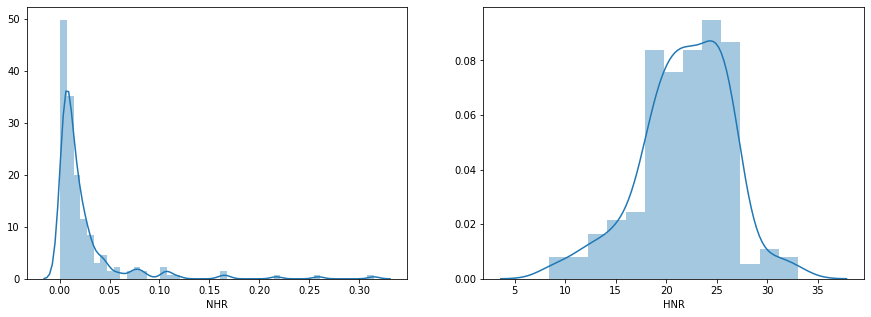

In [36]:
# Spread
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(pdata[Atr1gE],ax=ax[0]) 
sns.distplot(pdata[Atr2gE],ax=ax[1]) 


The plots above represents the Two measures of ratio of noise to tonal components in the voice. Right skewness for NHR and left skewness for HNR is also evident from the plots.

In [37]:
#Correlation of attributes of group D with other attributes.
corr_atr1gE=pdata[pdata.columns].corr()[Atr1gE][:]
corr_atr2gE=pdata[pdata.columns].corr()[Atr2gE][:]


pd.concat([round(corr_atr2gE,4),round(corr_atr2gE,4)],axis=1,sort=False).T


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
HNR,0.0591,-0.0249,0.2109,-0.7282,-0.6568,-0.7215,-0.7315,-0.7215,-0.8353,-0.8278,...,-0.8271,-0.7141,1.0,-0.3615,-0.5987,-0.0087,-0.6732,-0.4316,-0.6014,-0.6929
HNR,0.0591,-0.0249,0.2109,-0.7282,-0.6568,-0.7215,-0.7315,-0.7215,-0.8353,-0.8278,...,-0.8271,-0.7141,1.0,-0.3615,-0.5987,-0.0087,-0.6732,-0.4316,-0.6014,-0.6929


While both the measures of ratio of noise to tonal components in the voice have low correlation with the measure of Vocal fundamental frequency;
However, they seem to have high correlation with most of all the other attributes.
As highlighted while performing EDA for group C and group D, for group E  as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

Group F :
RPDE,D2:__ From the data description section  which captures basic statistical information, it appear that mean and median are close to each other; hence it seems that the attributes have minimal skewness. Lets perform EDA on Group F.

In [38]:
# Attributes in the Group
Atr1gF='RPDE'
Atr2gF='D2'

In [39]:
#5 point summary to understand spread
Atr1gF_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gF]]
Atr2gF_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gF]]

summ_gF = pd.concat([Atr1gF_5pt,Atr2gF_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gF)

The 5 point summary of attributes in group c are: 
 
          RPDE        D2
min  0.256570  1.423287
25%  0.421306  2.099125
50%  0.495954  2.361532
75%  0.587562  2.636456
max  0.685151  3.671155


From the 5 point summary above:

RPDE:

The range of RPDE is [0.256570,0.685151] with a median of 0.495954. The mean (from section2.5) is close to median which means that there is negligible skewness.
There doesnt seem to be any outliars. We will plot a box plot to confirm the same.

D2:

The range of D2 is [1.423287,3.671155] with a median of 2.361532. The mean (from section2.5) is close to median which means that there is negligible skewness.
There doesnt seem to be any outliars. We will plot a box plot to confirm the same.

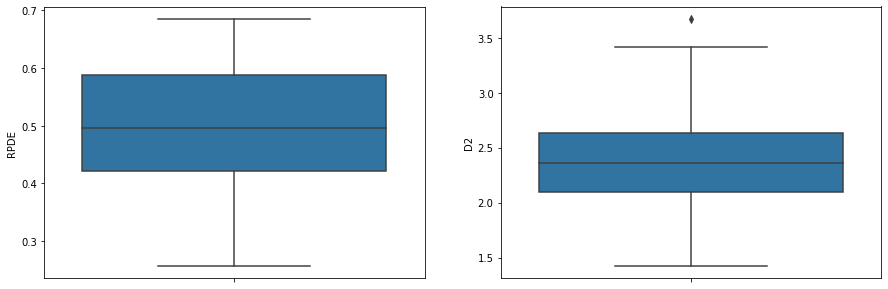

In [40]:
#Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.boxplot(x=Atr1gF,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gF,data=pdata, ax=ax[1],orient='v')

From the box plot above it appears that while RPDE has some left skewness; D2 has some skewness on the right. We'll compute the skewness in the next section
While RPDE doesnt have any outliars; There are outliars for D2

In [41]:
#Skewness check
Atr1gF_skew=round(stats.skew(pdata[Atr1gF]),4)
Atr2gF_skew=round(stats.skew(pdata[Atr2gF]),4)

print(' The skewness of',Atr1gF,'is', Atr1gF_skew)
print(' The skewness of',Atr2gF,'is', Atr2gF_skew)

 The skewness of RPDE is -0.1423
 The skewness of D2 is 0.4271


Clearly both the attributes have skewness. While D2 has positive skewness indicating that the skewness is on the right. RPDE has slight negative skewness indicating that the skewness is on the left.

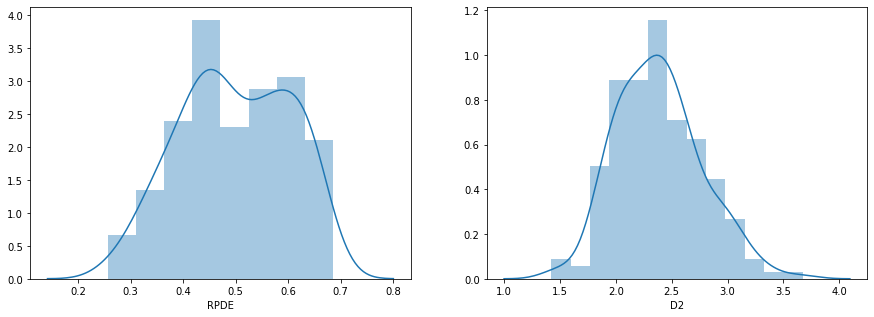

In [42]:
# Spread
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(pdata[Atr1gF],ax=ax[0]) 
sns.distplot(pdata[Atr2gF],ax=ax[1]) 


The plots above represents the Two nonlinear dynamical complexity measures. Left skewness for RPDE and right skewness for D2 is also evident from the plots.

In [43]:
#Correlation of attributes of group F with other attributes.
corr_atr1gF=pdata[pdata.columns].corr()[Atr1gF][:]
corr_atr2gF=pdata[pdata.columns].corr()[Atr2gF][:]


pd.concat([round(corr_atr1gF,4),round(corr_atr2gF,4)],axis=1,sort=False).T


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
RPDE,-0.3839,-0.1124,-0.4001,0.3607,0.4418,0.3421,0.3333,0.3421,0.4474,0.4107,...,0.4352,0.3709,-0.5987,0.3086,1.0000,-0.1109,0.5911,0.4799,0.2369,0.5459
D2,0.1780,0.1763,-0.1006,0.4334,0.3107,0.4266,0.4125,0.4266,0.5071,0.5122,...,0.4673,0.4709,-0.6014,0.3402,0.2369,-0.1654,0.4951,0.5235,1.0000,0.4806


Both the measures of nonlinear dynamical complexity seem to have some corelation most of all the other attributes.
As highlighted while performing EDA for group C, group D and group E, for Group F as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

In [44]:
Atr1gG='DFA'

In [45]:
#5 point summary to understand spread
Atr1gG_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gG]]

summ_gG = pd.concat([Atr1gG_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gG)

The 5 point summary of attributes in group c are: 
 
           DFA
min  0.574282
25%  0.674758
50%  0.722254
75%  0.761881
max  0.825288


From the 5 point summary above:

DFA:
The range of DFA is [0.574282,0.825288] with a median of 0.722254. The mean (from section2.5) is close to median which means that there is minimal skewness.
There doesnt seem to be any outliars. We will plot a box plot to confirm the same.


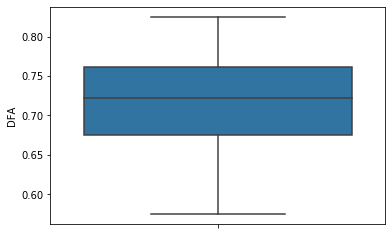

In [46]:
#Outliar Detection leveraging Box Plot
sns.boxplot(x=Atr1gG,data=pdata,orient='v') 


From the box plot above it appears that DFA has slight left skewness; We'll compute the skewness in the next section
There doesnt appear to be any outliars for DFA

In [47]:
#Skewness check
Atr1gG_skew=round(stats.skew(pdata[Atr1gG]),4)


print(' The skewness of',Atr1gG,'is', Atr1gG_skew)


 The skewness of DFA is -0.033


DFA has slight negative skewness.

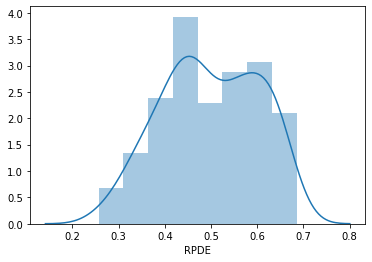

In [48]:
# Spread

sns.distplot(pdata[Atr1gF]) 



The plots above represents the spread of Signal fractal scaling exponents. As it is visible, there is slight Left skewness for DFA.

In [49]:
#Correlation of attributes of group F with other attributes.
corr_atr1gG=pdata[pdata.columns].corr()[Atr1gG][:]


pd.concat([round(corr_atr1gG,4)],axis=1,sort=False).T

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
DFA,-0.446,-0.3431,-0.0504,0.0986,0.175,0.0641,0.1963,0.064,0.16,0.1652,...,0.1511,-0.1319,-0.0087,0.2317,-0.1109,1.0,0.1957,0.1665,-0.1654,0.2704


Signal fractal scaling exponent seem to have some corelation with Average vocal fundamental frequency and maximum vocal fundamental frequency. Apart from these 2 attributes, DFA doesnt seem to have correlation with any other attribute.

Group H:
spread1, spread2, PPE:__ From the data description section (step 2.5) which captures basic statistical information, it appear that for all the 3 attributes mean is slightly greater than median; hence it seems that the attributes have positive skewness. Lets perform EDA on Group H.

In [50]:
Atr1gH='spread1'
Atr2gH='spread2'
Atr3gH='PPE'

In [51]:
#5 point summary to understand spread
Atr1gH_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr1gH]]
Atr2gH_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr2gH]]
Atr3gH_5pt=pdata.describe().loc[['min','25%','50%','75%','max'],[Atr3gH]]

summ_gH = pd.concat([Atr1gH_5pt,Atr2gH_5pt,Atr3gH_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group c are:','\n','\n',summ_gH)

The 5 point summary of attributes in group c are: 
 
       spread1   spread2       PPE
min -7.964984  0.006274  0.044539
25% -6.450096  0.174351  0.137451
50% -5.720868  0.218885  0.194052
75% -5.046192  0.279234  0.252980
max -2.434031  0.450493  0.527367


From the 5 point summary above:

spread1:

The range of spread1 is [-7.964984,-2.434031] with a median of -5.720868. The mean is close to median which means that there is some skewness.
There seem to be some outliars on the right hand side. We will plot a box plot to confirm the same.

spread2:

The range of spread2 is [0.006274,0.450493] with a median of 0.218885. The mean is close to median which means that there is some skewness.
There seem to be some outliars. We will plot a box plot to confirm the same.

PPE:

The range of PPE is [0.044539,0.527367] with a median of 0.194052. The mean is close to median which means that there is some skewness.
There seem to be some outliars on the right hand side. We will plot a box plot to confirm the same.


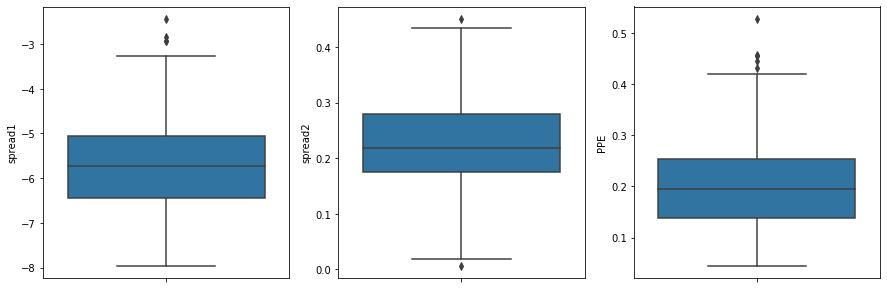

In [52]:
#Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,3,figsize=(15,5)) 
sns.boxplot(x=Atr1gH,data=pdata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2gH,data=pdata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3gH,data=pdata, ax=ax[2],orient='v')

From the box plots above it appears that while all 3 attributes have positive skewness which means there is skewness on the right. We'll compute the skewness in the next section
All the 3 attributes have few outliars

In [53]:
#Skewness check
Atr1gH_skew=round(stats.skew(pdata[Atr1gH]),4)
Atr2gH_skew=round(stats.skew(pdata[Atr2gH]),4)
Atr3gH_skew=round(stats.skew(pdata[Atr3gH]),4)


print(' The skewness of',Atr1gH,'is', Atr1gH_skew)
print(' The skewness of',Atr1gH,'is', Atr2gH_skew)
print(' The skewness of',Atr1gH,'is', Atr3gH_skew)

 The skewness of spread1 is 0.4288
 The skewness of spread1 is 0.1433
 The skewness of spread1 is 0.7913


Clearly all the attributes in this group have some positive skewness indicating that the skewness is on the right.

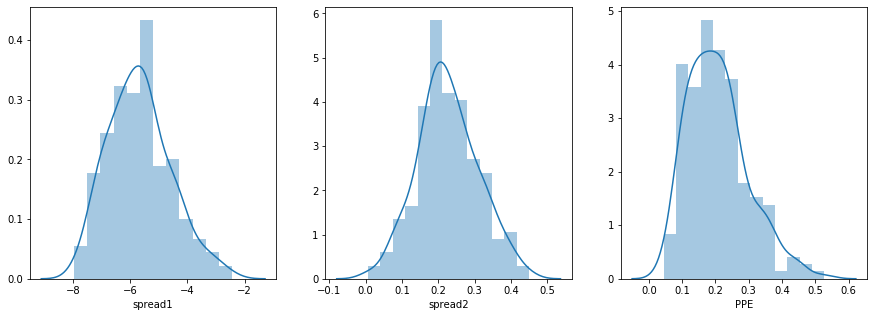

In [54]:
fig, ax = plt.subplots(1,3,figsize=(15,5)) 
sns.distplot(pdata[Atr1gH],ax=ax[0]) 
sns.distplot(pdata[Atr2gH],ax=ax[1])
sns.distplot(pdata[Atr3gH],ax=ax[2]) 

The plots above represents the Three nonlinear measures of fundamental frequency measures. As it can be seen there is slight right skewness in PPE and spread 1

Comparison of Three nonlinear measures of fundamental frequency between people having PD (status=1) and people not having PD (status=0).


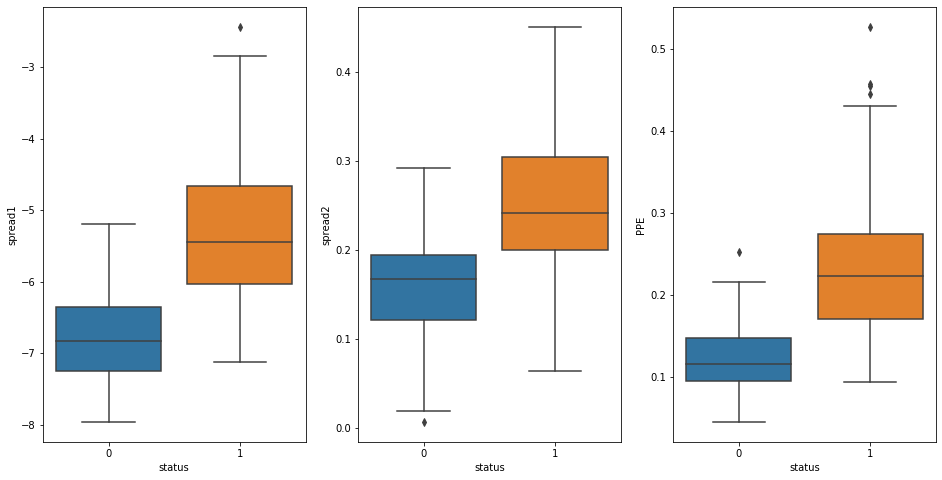

In [55]:

fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.boxplot(x='status',y=Atr1gH,data=pdata,ax=ax[0])
sns.boxplot(x='status',y=Atr2gH,data=pdata,ax=ax[1])
sns.boxplot(x='status',y=Atr3gH,data=pdata,ax=ax[2])

Spread1

The range of variation is more for subjects having PD when compared to people not having PD.
There seem to be outliars for subjects with PD; where there doesnt seem to be any outliars for subjects who don't have PD
Spread2

The range of variation is more for subjects having PD when compared to people not having PD.
There are outliars for subjects who dont have PD.
PPE

The range of variation is more for subjects having PD when compared to people not having PD.
There are outliars for both the status. The outliars are on the right hand side.

In [57]:
#Correlation of attributes of group F with other attributes.
corr_atr1gH=pdata[pdata.columns].corr()[Atr1gH][:]
corr_atr2gH=pdata[pdata.columns].corr()[Atr2gH][:]
corr_atr3gH=pdata[pdata.columns].corr()[Atr3gH][:]


pd.concat([round(corr_atr1gH,4),round(corr_atr2gH,4),round(corr_atr3gH,4)],axis=1,sort=False).T

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
spread1,-0.4137,-0.0767,-0.3949,0.6936,0.7358,0.6483,0.7165,0.6483,0.6547,0.6525,...,0.6110,0.5409,-0.6732,0.5648,0.5911,0.1957,1.0000,0.6524,0.4951,0.9624
spread2,-0.2495,-0.0030,-0.2438,0.3851,0.3885,0.3244,0.4076,0.3244,0.4520,0.4543,...,0.4022,0.3181,-0.4316,0.4548,0.4799,0.1665,0.6524,1.0000,0.5235,0.6447
PPE,-0.3724,-0.0695,-0.3401,0.7215,0.7482,0.6710,0.7696,0.6710,0.6938,0.6951,...,0.6454,0.5526,-0.6929,0.5310,0.5459,0.2704,0.9624,0.6447,0.4806,1.0000


spread1 and PPE seem to have correlation with most of other attributes. As highlighted earlier, we will check multi-collinearity in the data and try to remediate it. spread2 seems to have some correlation with few of the variables. This will also become clear when compute multi-collinearity

Group I :
Status:__ The target column i.e. Status is a categorical variable and has boolean values (0,1) which essentially captures the health status of the subject. A value of 1 indicates that the subject has PD and a value of 0 indicates that the subject doesnt have PD. Lets perform EDA on Group I.

In [59]:
AtrgI='status'

In [60]:
import math as math
#Count of subjects who had Parkinson Disease and subjects who did not have Parkinson Disease

pdata_yPD= pdata[pdata[AtrgI]==1]
pdata_nPD= pdata[pdata[AtrgI]==0]
num_yPD=pdata[AtrgI][pdata[AtrgI]==1].count()
num_nPD=pdata[AtrgI][pdata[AtrgI]==0].count()

print('The total number of subjects who have Parkinson Disease are',num_yPD,'which is',round(num_yPD/shape_pdata[0]*100,2),
      'percent of the total dataset.')
print('The total number of subjects who do not have Parkinson Disease are',num_nPD,'which is',round(num_nPD/shape_pdata[0]*100,2),
      'percent of the total dataset.')

The total number of subjects who have Parkinson Disease are 147 which is 75.38 percent of the total dataset.
The total number of subjects who do not have Parkinson Disease are 48 which is 24.62 percent of the total dataset.


Observation:

The number of subjects who donot have Parkinson Disease is lot more than number of subjects who have parkinson Disease.
This makes the attribute 'status' which is also target variable, imbalanced. Hence, accuracy might not be the best evaluation of peformance. We will also leverage Recall, Precision and F1 score.

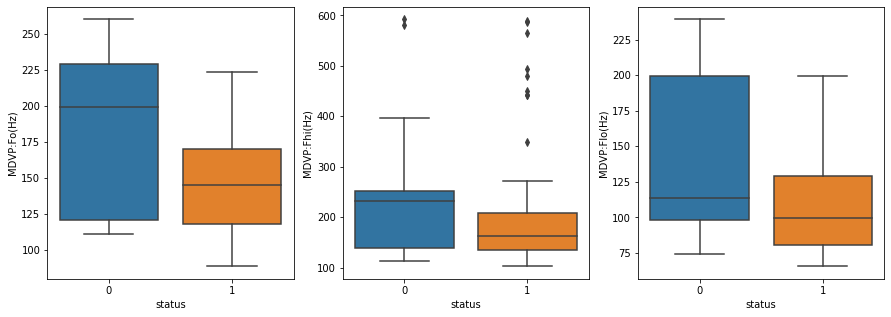

In [61]:
#Vocal frequency comparison between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x='status',y=Atr1gB,data=pdata,ax=ax[0])
sns.boxplot(x='status',y=Atr2gB,data=pdata,ax=ax[1])
sns.boxplot(x='status',y=Atr3gB,data=pdata,ax=ax[2])

MDVP:Fo(Hz)

- The median value of subject diagnosed with PD is around 145 whereas median value of people not diagnosed with PD is 200

MDVP:Fhi(Hz)

- The median value of subject diagnosed with PD is around 170 whereas median value of people not diagnosed with PD is 230

MDVP:Flo(Hz)

- The median value of subject diagnosed with PD is around 100 whereas median value of people not diagnosed with PD is 117

For all the 3 vocal fundamental frequency measures, it is quite evident that range of vocal frequency is more for people not having PD when compared to people haing PD.

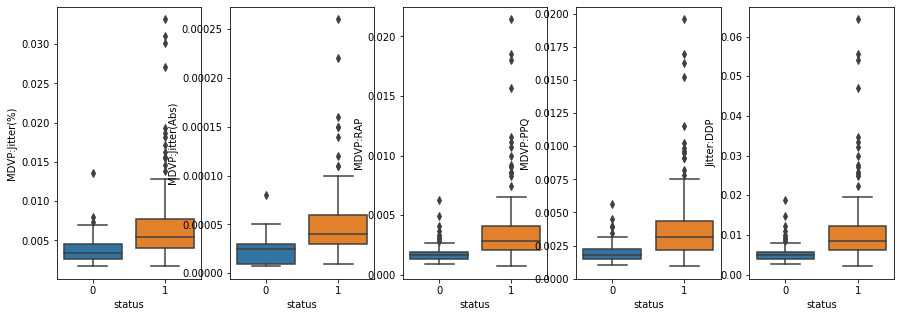

In [62]:
#Comparison of measures of variation in fundamental frequency between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,5,figsize=(15,5))
sns.boxplot(x='status',y=Atr1gC,data=pdata,ax=ax[0])
sns.boxplot(x='status',y=Atr2gC,data=pdata,ax=ax[1])
sns.boxplot(x='status',y=Atr3gC,data=pdata,ax=ax[2])
sns.boxplot(x='status',y=Atr4gC,data=pdata,ax=ax[3])
sns.boxplot(x='status',y=Atr5gC,data=pdata,ax=ax[4])

For all the measures of variation in fundamental frequency, it is quite evident that range of variation is more for people having PD when compared to people not having PD. There seem to be more outliars for people having PD when compared to people not having PD.

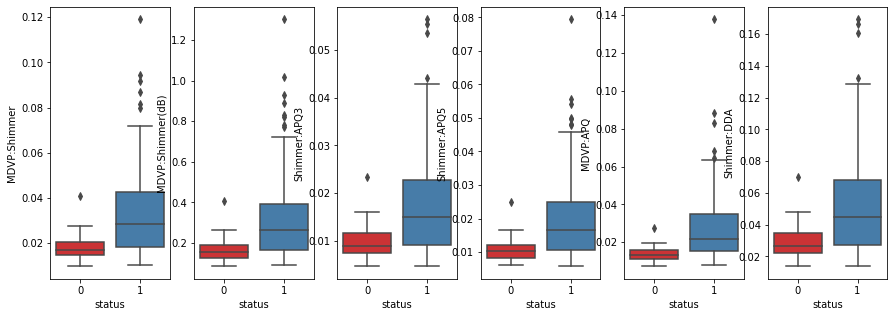

In [63]:
#Comparison of measures of variation in amplitude between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,6,figsize=(15,5))
sns.boxplot(x='status',y=Atr1gD,data=pdata,ax=ax[0],palette="Set1")
sns.boxplot(x='status',y=Atr2gD,data=pdata,ax=ax[1],palette="Set1")
sns.boxplot(x='status',y=Atr3gD,data=pdata,ax=ax[2],palette="Set1")
sns.boxplot(x='status',y=Atr4gD,data=pdata,ax=ax[3],palette="Set1")
sns.boxplot(x='status',y=Atr5gD,data=pdata,ax=ax[4],palette="Set1")
sns.boxplot(x='status',y=Atr6gD,data=pdata,ax=ax[5],palette="Set1")

For all the measures of variation in amplitude, it is quite evident that range of variation is more for people having PD when compared to people not having PD. There seem to be more outliars for people having PD when compared to people not having PD.
For all the attributes median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease.

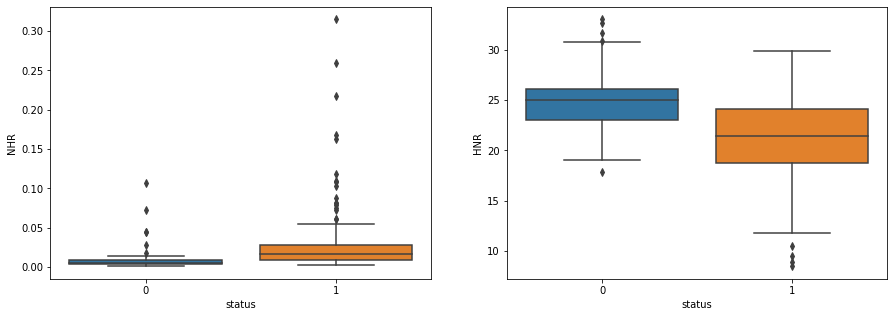

In [64]:
#Comparison of Two measures of ratio of noise to tonal components in the voice between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='status',y=Atr1gE,data=pdata,ax=ax[0])
sns.boxplot(x='status',y=Atr2gE,data=pdata,ax=ax[1])

NHR

The range of variation is more for subjects having PD when compared to people not having PD.
There seem to be more outliars for subjects having PD when compared to people not having PD.
Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease.
HNR

The range of variation is more for subjects having PD when compared to people not having PD. However, ratio of noise to tonal component in voice seem to be more for subject not having PD.
The density of outliars seems to be similar for subjects having PD and subjects not having PD. Density of Outliars for subjects not having PD seems to be on the right and the density of outliars for subjects having PD seems to be on the left.
Median of subjects diagnosed with Parkinson Disease is less than the median of subjects not diagnosed with Parkison Disease.

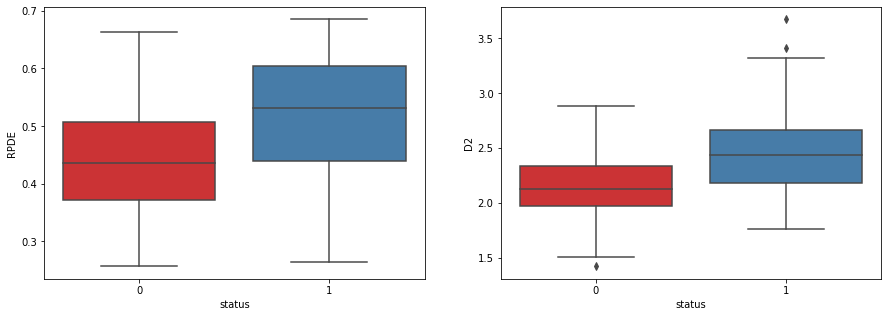

In [65]:
#Comparison of Two nonlinear dynamical complexity measures between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='status',y=Atr1gF,data=pdata,ax=ax[0],palette="Set1")
sns.boxplot(x='status',y=Atr2gF,data=pdata,ax=ax[1],palette="Set1")

RPDE

The range of variation is more for subjects having PD when compared to people not having PD.
There doesnt seem to be any outliars for both the status.
Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease.
D2

The range of variation is more for subjects having PD when compared to people not having PD.
There are outliars for both the status. Outliars for subjects having PD seems to be on the right and the outliars for subjects not having PD seems to be on the left.
Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease.

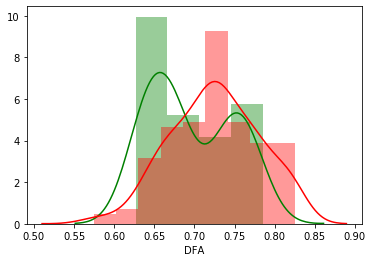

In [66]:
#Comparison of Signal fractal scaling exponent between people having PD (status=1) and people not having PD (status=0).

sns.distplot( pdata[pdata.status == 0][Atr1gG], color = 'g')
sns.distplot( pdata[pdata.status == 1][Atr1gG], color = 'r')


DFA

The range of Signal fractal scaling exponent is more for subjects having PD when compared to people not having PD.
There doesnt seem to be any outliars for both the status.
Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease.

# Split the data into training and test set in the ratio of 70:30 respectively

In [67]:
x=pdata.drop("status",axis=1)
y=pdata["status"]

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
# lets check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [70]:
print(x_train.shape)
print(x_test.shape)

(136, 22)
(59, 22)


# Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

Before we move forward, it is very important to process the data owning to the observations made as conclusion of step 2.
Referring them again: Observations and likely challenges in the dataset:

Scaling: Different independent variables have different scales e.g: DB, %age, Hz etc
Multi-collinearity (we have resolved the same in the previous step)
We will also check present of any missing values in the training and testing data.

In [71]:
 #lets create a copy of the train and test data for scaling
x_Train_stand = x_train.copy()
x_Test_stand = x_test.copy()

In [72]:
from sklearn.preprocessing import StandardScaler
#we will use standard scaler for scaling the data.
scale = StandardScaler().fit(x_Train_stand)

In [73]:
x_train= scale.transform(x_Train_stand)
x_test= scale.transform(x_Test_stand)

# Identifying missing values :

In [74]:
if (pd.DataFrame(x_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(x_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


# Train at least 3 standard classification algorithms - 
Logistic Regression,Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test
data

# Logistic regression :

In [75]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

PD_LR=LogisticRegression(solver="liblinear")
PD_LR.fit(x_train,y_train)
y_predict =PD_LR.predict(x_test)

coef_df =pd.DataFrame(PD_LR.coef_)
coef_df['intercept']=PD_LR.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0 -0.540812 -0.295293 -0.099222 -0.52524 -0.518743  0.304152 -0.207206   

          7         8         9  ...        13        14        15        16  \
0  0.304274  0.201216  0.186788  ...  0.075823 -0.212585 -0.056513 -0.211231   

        17        18        19        20        21  intercept  
0  0.24863  0.935272  0.110481  1.043262  0.635146   2.263207  

[1 rows x 23 columns]


In [76]:
model_score_PD = PD_LR.score(x_test,y_test)
print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_PD))
print()

Model Accuracy of Logistic Regression is: 0.8136



Confusion Matrix - Logistic Regression


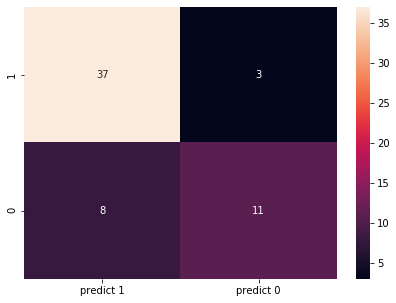

In [77]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index =[i for i in ["1","0"]],
      columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix: Logistic Regression

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 37

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 3

In [78]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        40
           0       0.79      0.58      0.67        19

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59



# Naive Bayes :

In [79]:
from sklearn.naive_bayes import GaussianNB
PD_NB = GaussianNB()
PD_NB.fit(x_train,y_train)

GaussianNB()

In [80]:
model_score = PD_NB.score(x_test,y_test)
print("Model Accuracy of Naive Bayes is: {0:.4f}".format(model_score))
print()

Model Accuracy of Naive Bayes is: 0.6780



Confusion Matrix - Naive Bayes


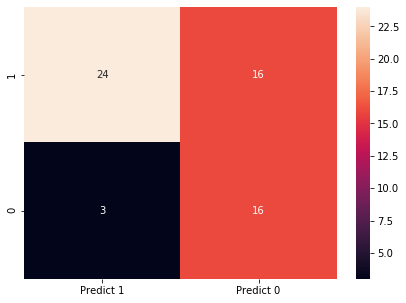

In [81]:
print("Confusion Matrix - Naive Bayes")
y_predict_nb=PD_NB.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict_nb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix: Naive Bayes

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 24

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 16

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 3

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 16

In [82]:
print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_nb, labels=[1, 0]))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.89      0.60      0.72        40
           0       0.50      0.84      0.63        19

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59



# KNN :

In [83]:
from sklearn.neighbors import KNeighborsClassifier
PD_KNN = KNeighborsClassifier(n_neighbors =5, weights = 'distance')
PD_KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [84]:
model_score_KNN = PD_KNN.score(x_test,y_test)
print("Model Accuracy of KNN is: {0:.4f}".format(model_score_KNN))
print()

Model Accuracy of KNN is: 0.8814



In [85]:
y_predict_knn = PD_KNN.predict(x_test)

Confusion Matrix - KNN


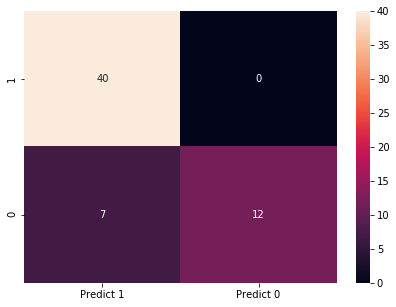

In [86]:
print("Confusion Matrix - KNN")
cm=metrics.confusion_matrix(y_test, y_predict_knn, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: KNN

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 12

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 7

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0

In [87]:
print("Classification Report - KNN")
print(metrics.classification_report(y_test, y_predict_knn, labels=[1, 0]))

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           0       1.00      0.63      0.77        19

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



# Stacking Classifier from SKLearn :

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),

]



In [89]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=KNeighborsClassifier()
)

In [90]:
model = clf.fit(x_train, y_train)
y_predict_Stack = model.predict(x_test)
print('The accuracy of the meta classifier  is: [%.8f]' % accuracy_score(y_test, y_predict_Stack))

The accuracy of the meta classifier  is: [0.86440678]


Confusion Matrix -meta Classifier


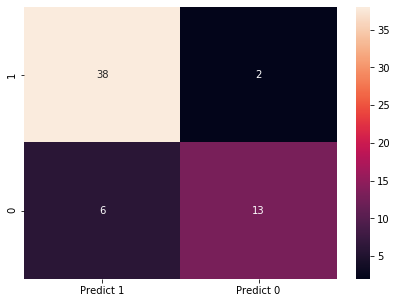

In [91]:
print("Confusion Matrix -meta Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_Stack, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Meta Classifier

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 13

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 6

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 2

In [92]:
print("Classification Report - Meta classifier")
print(metrics.classification_report(y_test, y_predict_Stack, labels=[1, 0]))

Classification Report - Meta classifier
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        40
           0       0.87      0.68      0.76        19

    accuracy                           0.86        59
   macro avg       0.87      0.82      0.83        59
weighted avg       0.86      0.86      0.86        59



# Ensemble Model 1: Random Forest

In [93]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(x_train, y_train)

In [94]:
y_predict_rf = model_rf.predict(x_test)
print(model_rf.score(x_test, y_test))

0.864406779661017


Confusion Matrix -Random Forest


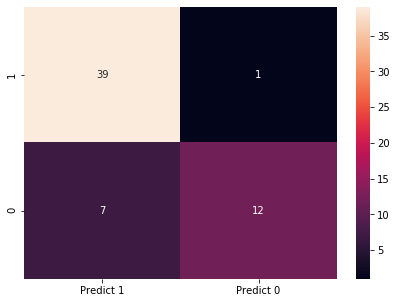

In [95]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Random Forest

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 39

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 12

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 7

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 1

In [96]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.92      0.63      0.75        19

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



# Ensemble Model 2: Bagging

In [97]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)

In [98]:
y_predict_bag = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))

0.8305084745762712


Confusion Matrix -Bagging Classifier


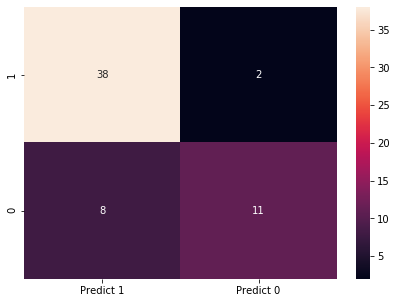

In [99]:
print("Confusion Matrix -Bagging Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Bagging Classifier

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 2

In [100]:
print("Classification Report -Bagging")
print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

Classification Report -Bagging
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.85      0.58      0.69        19

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59



# Ensemble Model 3: Ada Boost

In [101]:
AdaBGC = AdaBoostClassifier(n_estimators=50, random_state=1)
AdaBGC = AdaBGC.fit(x_train, y_train)

In [102]:
y_predict_ada = AdaBGC.predict(x_test)
print(AdaBGC.score(x_test , y_test))

0.8983050847457628


Confusion Matrix -Ada Boost


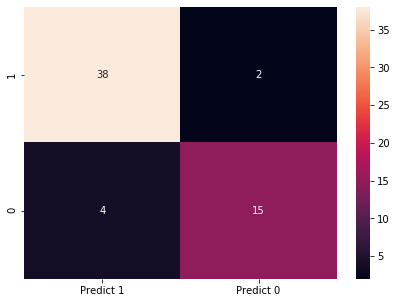

In [103]:
print("Confusion Matrix -Ada Boost")
cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Ada Boost

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 15

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 4

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 2

In [104]:
print("Classification Report - Ada Boosting")
print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

Classification Report - Ada Boosting
              precision    recall  f1-score   support

           1       0.90      0.95      0.93        40
           0       0.88      0.79      0.83        19

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



# Accuracy Comparison :

In [105]:
Accuracy_LR=round(metrics.accuracy_score(y_test, y_predict),2)
Recall_LR=round(metrics.recall_score(y_test, y_predict),2)
Precision_LR=round(metrics.precision_score(y_test, y_predict),2)
F1_LR=round(metrics.f1_score(y_test, y_predict),2)

In [106]:
Accuracy_NB=round(metrics.accuracy_score(y_test, y_predict_nb),2)
Recall_NB=round(metrics.recall_score(y_test, y_predict_nb),2)
Precision_NB=round(metrics.precision_score(y_test, y_predict_nb),2)
F1_NB=round(metrics.f1_score(y_test, y_predict_nb),2)

In [107]:
Accuracy_KNN=round(metrics.accuracy_score(y_test, y_predict_knn),2)
Recall_KNN=round(metrics.recall_score(y_test, y_predict_knn),2)
Precision_KNN=round(metrics.precision_score(y_test, y_predict_knn),2)
F1_KNN=round(metrics.f1_score(y_test, y_predict_knn),2)

In [108]:
Accuracy_Stack=round(metrics.accuracy_score(y_test, y_predict_Stack),2)
Recall_Stack=round(metrics.recall_score(y_test, y_predict_Stack),2)
Precision_Stack=round(metrics.precision_score(y_test, y_predict_Stack),2)
F1_Stack=round(metrics.f1_score(y_test, y_predict_Stack),2)

In [109]:
Accuracy_rf=round(metrics.accuracy_score(y_test, y_predict_rf),2)
Recall_rf=round(metrics.recall_score(y_test, y_predict_rf),2)
Precision_rf=round(metrics.precision_score(y_test, y_predict_rf),2)
F1_rf=round(metrics.f1_score(y_test, y_predict_rf),2)

In [110]:
Accuracy_bag=round(metrics.accuracy_score(y_test, y_predict_bag),2)
Recall_bag=round(metrics.recall_score(y_test, y_predict_bag),2)
Precision_bag=round(metrics.precision_score(y_test, y_predict_bag),2)
F1_bag=round(metrics.f1_score(y_test, y_predict_bag),2)

In [111]:
Accuracy_ada=round(metrics.accuracy_score(y_test, y_predict_ada),2)
Recall_ada=round(metrics.recall_score(y_test, y_predict_ada),2)
Precision_ada=round(metrics.precision_score(y_test, y_predict_ada),2)
F1_ada=round(metrics.f1_score(y_test, y_predict_ada),2)

In [112]:
summary = {'Accuracy': [Accuracy_LR,Accuracy_NB,Accuracy_KNN,Accuracy_Stack,Accuracy_rf,Accuracy_bag,Accuracy_ada],
                     'Recall': [Recall_LR,Recall_NB,Recall_KNN,Recall_Stack,Recall_rf,Recall_bag,Recall_ada],
                     'Precision': [Precision_LR,Precision_NB,Precision_KNN,Precision_Stack,Precision_rf,Precision_bag,Precision_ada],
                    'F1Score':[F1_LR,F1_NB,F1_KNN,F1_Stack,F1_rf,F1_bag,F1_ada]
          }

In [113]:
models=['Logistic Regression','Naive Bayes','KNN','Meta Classifier','Random Forest','Bagging','Ada Boosting']
sum_df = pd.DataFrame(summary,models)

In [114]:
sum_df

,Accuracy,Recall,Precision,F1Score
Logistic Regression,0.81,0.92,0.82,0.87
Naive Bayes,0.68,0.60,0.89,0.72
KNN,0.88,1.00,0.85,0.92
Meta Classifier,0.86,0.95,0.86,0.90
Random Forest,0.86,0.98,0.85,0.91
Bagging,0.83,0.95,0.83,0.88
Ada Boosting,0.90,0.95,0.90,0.93


Summary of the case study document and the objective of this exercise:
As learnt from the case study document, Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient.

Rationale behind leveraging Machine Learning Algorithm for predicting Parkinson Disease in subjects:
PD patients exhibit characteristic vocal features and voice recordings are a useful and non-invasive tool for diagnosis.
So this case study aims at identifying if Machine learning algorithms can be applied to a voice recording dataset to accurately diagnosis PD;
if this is successful then this would be an effective screening step prior to an appointment with a clinician;

We performed an exhuastive EDA; reduced multicollinearity; did scaling and built multiple models; in our endeavours to identify the model which gives the best results.

Now as learnt from the case study document, our main objective is to identify all the subjects which have Parkinson Disease.
The performance measure that helps with achieving this objective is Recall - Out of all the subjects who had Parkinson Disease; how many did our model identify.



The following models have the highest recall:
    
    1.KNN
    2.Meta Classifier
    3.Random Forest
    4.Bagging
    5.Ada boosting
    
    
The next performance measure that we will consider is Precision - Out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson Disease
    
Out of the models above (with highest Recall); Ada boosting has the highest precison (0.90). Ada boosting also has the highest accuracy.
Hence, Ada boosting is selected as the best model amongst all the models